# Stage 3 - HackBio Internship: Neuroscience and Psychology
## Team Members:
**Chama BENSLIMANE (Leader)**: [GitHub Profile](https://github.com/BenslimaneChama)

**Mohammad HICHAM POLO**: [GitHub Profile](https://github.com/MohammadHichamPolo)


## Project Overview
Here's the approach we followed for this project : 

- Data preprocessing and exploration
- Application of machine learning models for classification
- Biostatistical analysis of relevant factors
- Interpretation of results through markdown explanations and visualizations

Our work consists of 3 parts:
- Data processing 
- training machine, female data with different models 
- training machine, male data with different models 

I**In this notebook, we've processed our data, cleaned up outliers and eliminated any data that might distort our results.**


*All findings, including statistical interpretations and graph analyses, are documented within this notebook to provide a comprehensive understanding of the methodology and outcomes.*

# Packages Needed

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from joblib import Parallel, delayed
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve

# DATA IMPORTING

In [81]:
df = pd.read_csv('http://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/Student%20Depression%20Dataset.csv')
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


Once data has been imported, we run df to see what our dataframe would look like, and as we can see, we have quite a lot of qualitative (or str) data, which we should sort and digitize.

# DATA TREATEMENT

In [82]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

To find out in more detail all possible information about my data, and as we can see it gives us not only the column names, but also its type (object, float, int) but also how many rows there are, memory usage ect...

In [83]:
df=df.dropna()
df = df.drop(columns=['id'])

In [84]:
count_zero_job_satisfaction = (df['Job Satisfaction'] != 0.0).sum()
print(f"Number of students with Job Satisfaction = 0.0: {count_zero_job_satisfaction}")
count_zero_work_pressure = (df['Work Pressure'] != 0.0).sum()
print(f"Number of students with Work Pressure = 0.0: {count_zero_work_pressure}")
non_students_count = (df['Profession'] != 'Student').sum()
print(f"Number of people who are NOT students: {non_students_count}")

Number of students with Job Satisfaction = 0.0: 8
Number of students with Work Pressure = 0.0: 3
Number of people who are NOT students: 31


As we'll be concentrating only on students, as requested in the task for this stage 3, we first want to know how many people among our data have a profession, so we'd like to know how many people's job satifaction is different from 0, which is a very good indicator of whether a person is working or not, here the number is very weak... 8/27901.

In the same way, we will calculate how many people have a work pressure, different from 0, which is also a very small number 3/27901

And also to be sure we've only got students, we'll need to list how many people have professions or are not students, which according to our output is 31 people, a very small number compared to our data set. So we'll have to eliminate all data with a profession, since it's likely to distort our results, and what's more they're very few in number, which shows that it's not really important. Then we'll eliminate these columns, since all our dataset now consists of students with values of 0.0 for job satisfaction and work pressure.

In [85]:
df = df[(df['Job Satisfaction'] == 0.0) & (df['Work Pressure'] == 0.0)]
df = df[df['Profession'] == 'Student']
df = df.drop(columns=['Profession'])
df = df.drop(columns=['Job Satisfaction'])
df = df.drop(columns=['Work Pressure'])

In [86]:
print(df['City'].unique())

['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']


Now that we've filtered out non-student data, our focus shifts to the city columns. Since this is qualitative (text-based) data, where respondents manually enter their answers, there's a risk of duplicates or inconsistencies. To address this, we need to:
-Identify unique city names to ensure standardization.
-Review the full set of responses to detect any anomalies, such as typos, variations, or unexpected entries

And that's exactly what we've done here, after which we've found that there are false values such as “Me” or “M.Com” or even numerical values that are far from being city names. So we created a list with all valid city names, and deleted any values against this list.

In [87]:
valid_cities = [
    'Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur', 'Pune', 'Thane',
    'Chennai', 'Nagpur', 'Nashik', 'Vadodara', 'Kalyan', 'Rajkot', 'Ahmedabad',
    'Kolkata', 'Mumbai', 'Lucknow', 'Indore', 'Surat', 'Ludhiana', 'Bhopal',
    'Meerut', 'Agra', 'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
    'Faridabad', 'Delhi'
]


df = df[df['City'].isin(valid_cities)]

In [88]:
le_city = LabelEncoder()
df['City'] = le_city.fit_transform(df['City'])

# Save the mapping of City names to numbers
city_mapping = dict(zip(le_city.classes_, le_city.transform(le_city.classes_)))

print(city_mapping)

{'Agra': 0, 'Ahmedabad': 1, 'Bangalore': 2, 'Bhopal': 3, 'Chennai': 4, 'Delhi': 5, 'Faridabad': 6, 'Ghaziabad': 7, 'Hyderabad': 8, 'Indore': 9, 'Jaipur': 10, 'Kalyan': 11, 'Kanpur': 12, 'Kolkata': 13, 'Lucknow': 14, 'Ludhiana': 15, 'Meerut': 16, 'Mumbai': 17, 'Nagpur': 18, 'Nashik': 19, 'Patna': 20, 'Pune': 21, 'Rajkot': 22, 'Srinagar': 23, 'Surat': 24, 'Thane': 25, 'Vadodara': 26, 'Varanasi': 27, 'Vasai-Virar': 28, 'Visakhapatnam': 29}


Now that we're sure we've only got cities, we'll have to digitize them to make it easier for the machine to learn, but without really forgetting their names, in order that if ever depression depended on cities, we could easily know which one had the most effect. So we created a dictionary containing not only the new city label, but also its name.

In [89]:
print(df['Sleep Duration'].unique()) 

['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']


We're now interested in knowing, as we did for the cities, the contents of the sleep duration column, to find out how to maintain it. The output shows that it contains 5 text sections, which we'll need to digitize.

In [90]:
categorical_cols = ['Gender', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

label_encoders = {}

# Encode each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
    # Store the mapping of labels to numbers
    label_encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

for col, mapping in label_encoders.items():
    print(f"Mapping for {col}: {mapping}")


sleep_mapping = {
    'Less than 5 hours': 4,
    '5-6 hours': 5.5,
    'Others': 6.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9
}

df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)

Mapping for Gender: {'Female': 0, 'Male': 1}
Mapping for Dietary Habits: {'Healthy': 0, 'Moderate': 1, 'Others': 2, 'Unhealthy': 3}
Mapping for Degree: {'B.Arch': 0, 'B.Com': 1, 'B.Ed': 2, 'B.Pharm': 3, 'B.Tech': 4, 'BA': 5, 'BBA': 6, 'BCA': 7, 'BE': 8, 'BHM': 9, 'BSc': 10, 'Class 12': 11, 'LLB': 12, 'LLM': 13, 'M.Com': 14, 'M.Ed': 15, 'M.Pharm': 16, 'M.Tech': 17, 'MA': 18, 'MBA': 19, 'MBBS': 20, 'MCA': 21, 'MD': 22, 'ME': 23, 'MHM': 24, 'MSc': 25, 'Others': 26, 'PhD': 27}
Mapping for Have you ever had suicidal thoughts ?: {'No': 0, 'Yes': 1}
Mapping for Family History of Mental Illness: {'No': 0, 'Yes': 1}


As part of the data digitization process, we've automatically standardized the labels for all qualitative values to prevent inconsistencies. To ensure traceability, we've also created a dictionary to store and verify these labels later.

However, sleep duration is an exception since it contains more specific and varied data that can't be easily standardized through automation. Therefore, we'll need to manually adjust these values before converting them into the final table.

#### OUTLIERS TREATEMENT

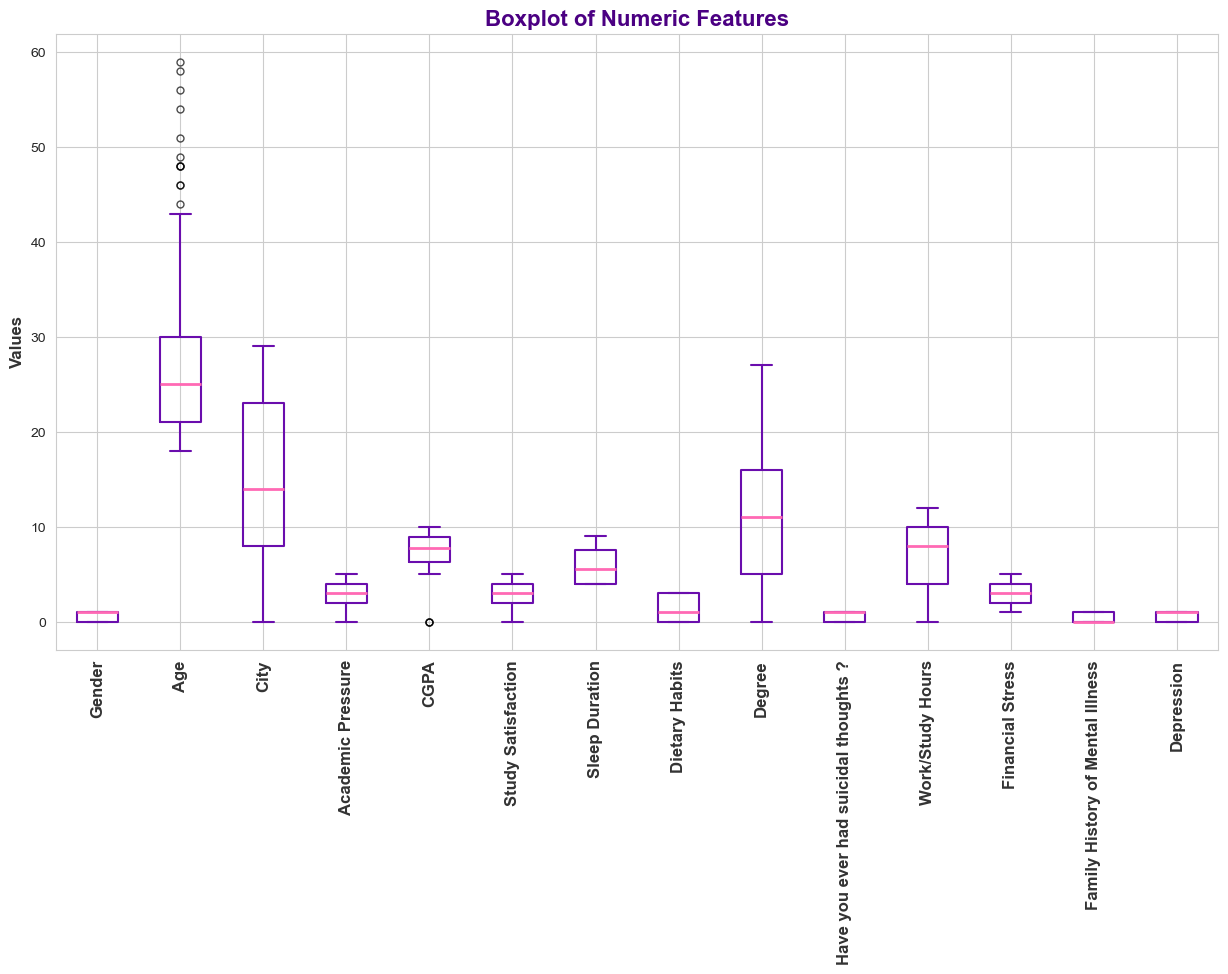

In [91]:
numeric_cols = df.select_dtypes(include=['number']).columns

sns.set_style("whitegrid")


box_color = "#6a0dad"  # Deep purple
median_color = "#ff69b4"  # Pink
outlier_color = "#d946ef"  # Soft magenta


plt.figure(figsize=(15, 8))


boxprops = dict(color=box_color, linewidth=1.5)
whiskerprops = dict(color=box_color, linewidth=1.5)
capprops = dict(color=box_color, linewidth=1.5)
medianprops = dict(color=median_color, linewidth=2)
flierprops = dict(marker='o', color=outlier_color, markersize=5, alpha=0.7)

df[numeric_cols].boxplot(rot=90, 
                         boxprops=boxprops, 
                         whiskerprops=whiskerprops, 
                         capprops=capprops, 
                         medianprops=medianprops, 
                         flierprops=flierprops)

plt.title("Boxplot of Numeric Features", fontsize=16, fontweight='bold', color="#4B0082")

plt.xticks(fontsize=12, fontweight='bold', color="#333333")

plt.ylabel("Values", fontsize=12, fontweight='bold', color="#333333")

plt.show()

To ensure the presence of outliers, or their absence, we generated a boxplot for each of the remaining features, but also to see their variability. 
The graph shows boxes, each representing its variation, a pink line showing the median, and the whiskers show the spread of most data, while the dots are outliers.

As for the results, we can see that in 'Age' there are a lot of outliers, people over 40 years of age, and in 'CGPA' there's also an outlier. What we also notice is that 'City' shows a very high variability, while 'Depression' or 'gender', for example, show a very small box. This is due to the fact that they represent binary data, i.e. either 0 or 1.
Once outliers have been detected, we need to eliminate them, to keep only normalized data, and thus reduce the risk of our analysis being biased.


In [92]:
z_scores = np.abs(zscore(df[numeric_cols]))
outlier_threshold = 3
outliers = (z_scores > outlier_threshold).sum()

print("Number of outliers per column:")
print(outliers)

Number of outliers per column:
22


In addition to detecting outliers, it is important to quantify them, in order to determine whether or not it is essential to eliminate them. To do so, we performed the Z-score, which is based on the standard deviation and the mean, indicating the threshold as 3 (we won't consider a point as outlier unless it's greater than 3).
The result of this method is the presence of 19 outliers for 'Age', and 3 for 'CGPA'.

In [93]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count number of outliers
outliers_iqr = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).sum()

print("Outliers detected using IQR method:")
print(outliers_iqr)

Outliers detected using IQR method:
Gender                                    0
Age                                      12
City                                      0
Academic Pressure                         0
CGPA                                      3
Study Satisfaction                        0
Sleep Duration                            0
Dietary Habits                            0
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
dtype: int64


We also applied the Interquartile Range (IQR) method, which, as its name suggests, is based on quartiles. The result also reveals outliers for 'Age' and 'CGPA', but this time the number of outliers for the former is 12, which is much lower than the Z-score method. For 'CGPA', the result remains the same (3).

This may be explained by the fact that Z-score detects more outliers because it relies on standard deviation, which can be distorted by extreme values. However, IQR is more reliable, as it is based on quartiles and ignores extreme values when calculating thresholds.

In [94]:
print(df[df['Age'] < 18]) 

Empty DataFrame
Columns: [Gender, Age, City, Academic Pressure, CGPA, Study Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression]
Index: []


We'd like to know if there's any data for students under 18, but the result is zero, which means there isn't any.

In [95]:
print(df[df['Age'] > 40])

       Gender   Age  City  Academic Pressure  CGPA  Study Satisfaction  \
1076        0  42.0    22                2.0  9.03                 5.0   
2909        0  58.0     4                4.0  8.58                 1.0   
3436        1  49.0    18                3.0  6.47                 3.0   
4386        0  51.0     3                2.0  8.26                 3.0   
5537        0  44.0    23                1.0  6.83                 3.0   
6662        1  43.0    22                5.0  5.64                 2.0   
9006        1  46.0    19                1.0  6.10                 3.0   
9238        1  59.0    19                1.0  8.14                 1.0   
11532       1  42.0    13                5.0  6.10                 1.0   
13499       1  54.0     0                5.0  9.60                 2.0   
13618       0  48.0     7                3.0  7.48                 5.0   
14819       0  56.0    15                3.0  7.94                 5.0   
16757       0  43.0     3             

We then examined the presence of students over the age of 40 and identified 19 cases. The boxplot before had shown that these were considered outliers, so we eliminated them, to cleanse our dataset of any outliers. 

In [96]:
df = df[df['Age'] <= 40]

In [97]:
print(df[df['CGPA'] < 5])

       Gender   Age  City  Academic Pressure  CGPA  Study Satisfaction  \
10407       1  28.0    26                3.0   0.0                 4.0   
11489       0  32.0    26                5.0   0.0                 0.0   
21805       1  34.0    21                1.0   0.0                 5.0   

       Sleep Duration  Dietary Habits  Degree  \
10407             4.0               0       6   
11489             4.0               3      11   
21805             4.0               3      15   

       Have you ever had suicidal thoughts ?  Work/Study Hours  \
10407                                      0              12.0   
11489                                      1              11.0   
21805                                      1              10.0   

       Financial Stress  Family History of Mental Illness  Depression  
10407               2.0                                 0           0  
11489               5.0                                 0           1  
21805               3.0  

In the same way as for the 'Age' column, we applied outlier detection to the 'CGPA' column, checking for values below 5 (my minimum value). The result revealed 3 observations with a value of 0.0, classifying them as outliers. 

In [98]:
df = df[df['CGPA'] > 0]

In [99]:
print(df[df['CGPA'] > 10])

Empty DataFrame
Columns: [Gender, Age, City, Academic Pressure, CGPA, Study Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression]
Index: []


We then analyzed our results, looking for any 'CGPA' column with a value greater than 10 (maximum value), and found none. 

#### STATISTICAL ANALYSIS 

In [100]:
for col in numeric_cols:
    stat, p = shapiro(df[col].dropna())
    print(f"{col}: p-value = {p}")

Gender: p-value = 7.070355689338619e-117
Age: p-value = 5.774161998882359e-69
City: p-value = 4.6460684192599825e-68
Academic Pressure: p-value = 6.0500203213624025e-86
CGPA: p-value = 1.170200865554193e-69
Study Satisfaction: p-value = 1.3948342809516019e-84
Sleep Duration: p-value = 3.59347043574278e-95
Dietary Habits: p-value = 2.880752740845253e-104
Degree: p-value = 3.096908633850012e-68
Have you ever had suicidal thoughts ?: p-value = 1.9821869924857842e-118
Work/Study Hours: p-value = 1.7347276652109604e-78
Financial Stress: p-value = 3.4120989334723403e-88
Family History of Mental Illness: p-value = 1.5104362509142692e-116
Depression: p-value = 2.587332795966819e-117


c:\Users\HP\anaconda3\envs\pycoding\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27811.
  res = hypotest_fun_out(*samples, **kwds)


We applied the Shapiro-Wilk test to each numerical column in the DataFrame to check whether the data follow a normal distribution. 
In our case, the results show that all p-values are extremely low (< 0.05), which would indicate that none of the variables follows a normal distribution.


**However, an important note: the Shapiro-Wilk test is not reliable for large samples (>5000), so we couldn't take it into consideration.**


In [101]:
print("Skew")
print(df[numeric_cols].skew())  
print("Kurtosis")
print(df[numeric_cols].kurtosis())

Skew
Gender                                  -0.230575
Age                                      0.071884
City                                    -0.033453
Academic Pressure                       -0.134384
CGPA                                    -0.073345
Study Satisfaction                       0.011216
Sleep Duration                           0.078991
Dietary Habits                           0.228794
Degree                                   0.360648
Have you ever had suicidal thoughts ?   -0.551212
Work/Study Hours                        -0.456073
Financial Stress                        -0.129921
Family History of Mental Illness         0.064400
Depression                              -0.346779
dtype: float64
Kurtosis
Gender                                  -1.946975
Age                                     -1.173693
City                                    -1.187252
Academic Pressure                       -1.163530
CGPA                                    -1.229481
Study Satisfaction   

Since the first test could not be relied upon, we took two further statistical measurements to ensure the normality of our data. 
- Skewness measures whether the data distribution is symmetrical or skewed. 
The results show that almost all columns have a skewness close to 0, suggesting that they are roughly symmetrical.
- Flatness, which measures the shape of the tails of the distribution in relation to a normal distribution.
The results show that almost all values are negative, indicating that the distributions are flatter than normal, with fewer extreme values.

In [102]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27811 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27811 non-null  int32  
 1   Age                                    27811 non-null  float64
 2   City                                   27811 non-null  int32  
 3   Academic Pressure                      27811 non-null  float64
 4   CGPA                                   27811 non-null  float64
 5   Study Satisfaction                     27811 non-null  float64
 6   Sleep Duration                         27811 non-null  float64
 7   Dietary Habits                         27811 non-null  int32  
 8   Degree                                 27811 non-null  int32  
 9   Have you ever had suicidal thoughts ?  27811 non-null  int32  
 10  Work/Study Hours                       27811 non-null  float64
 11  Financi

So we check our whole database, whether all the values are now numerical, whether there are any empty columns, how many rows we have, etc.... So we can work directly from this point.

# WHOLE FEATURES GENERAL POPULATION PCA PLOT AND BY GENDER 

##### FUNCTION TO PLOT PCA BY GENDER

In [103]:
gender_map = {0: "Female", 1: "Male"}


custom_palette = {0: "#A44CCD", 1: "#2B2AD2"}

def plot_pca_by_gender(df, gender, ax):
    df_gender = df[df["Gender"] == gender]
    

    scaled_data_gender = scaler.fit_transform(df_gender[numeric_columns])
    

    pca_gender = PCA(n_components=2)
    pca_components_gender = pca_gender.fit_transform(scaled_data_gender)
    
   
    loadings_gender = pd.DataFrame(pca_gender.components_.T, columns=["PC1", "PC2"], index=numeric_columns)
    top_vars_pc1_gender = loadings_gender["PC1"].abs().nlargest(3).index.tolist()
    top_vars_pc2_gender = loadings_gender["PC2"].abs().nlargest(3).index.tolist()
    
    
    pca_df_gender = pd.DataFrame(pca_components_gender, columns=["PCA1", "PCA2"])
    pca_df_gender["Depression"] = df_gender["Depression"].values
    
    
    sns.scatterplot(data=pca_df_gender, x="PCA1", y="PCA2", hue="Depression", 
                    palette=custom_palette, alpha=0.7, ax=ax)
    
  
    ax.set_xlabel(f"PCA1 ({', '.join(top_vars_pc1_gender)})")
    ax.set_ylabel(f"PCA2 ({', '.join(top_vars_pc2_gender)})")
    ax.set_title(f"PCA - {gender_map[gender]}")
    ax.legend(title="Depression")

##### PCA PLOTS

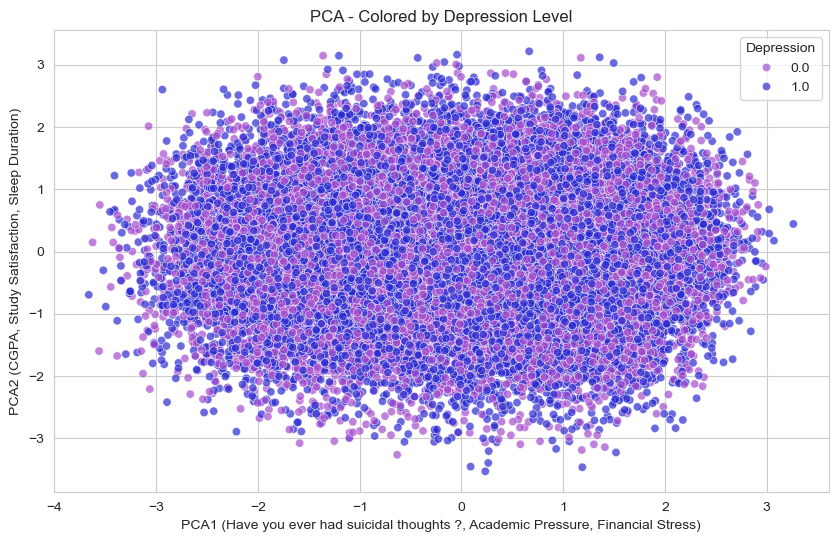

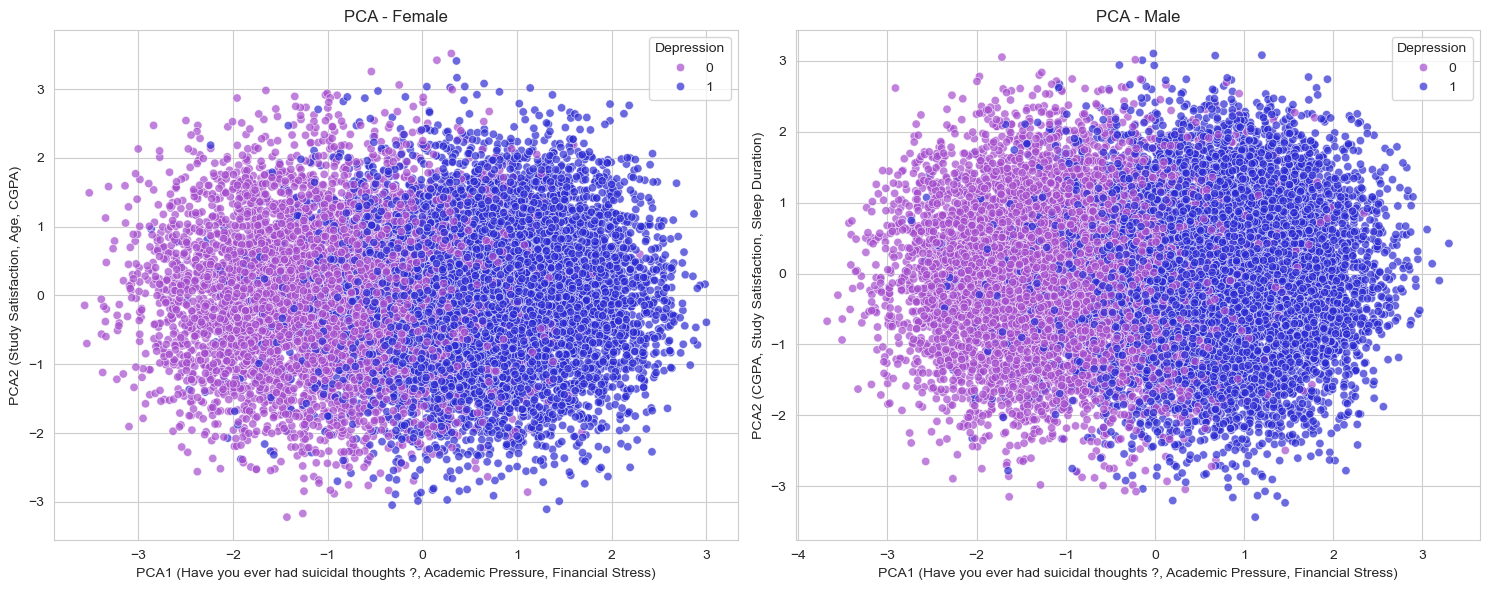

In [104]:
exclude_columns = ["Depression", "City", "Degree", "Gender"]  
numeric_columns = [col for col in df.columns if col not in exclude_columns and pd.api.types.is_numeric_dtype(df[col])]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

loadings = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2"], index=numeric_columns)
top_vars_pc1 = loadings["PC1"].abs().nlargest(3).index.tolist()  
top_vars_pc2 = loadings["PC2"].abs().nlargest(3).index.tolist() 

pca_df = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])
pca_df["Depression"] = df["Depression"]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Depression", palette=custom_palette, alpha=0.7)
plt.xlabel(f"PCA1 ({', '.join(top_vars_pc1)})")
plt.ylabel(f"PCA2 ({', '.join(top_vars_pc2)})")
plt.title("PCA - Colored by Depression Level")
plt.legend(title="Depression")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Male (Gender 0)
plot_pca_by_gender(df, gender=0, ax=axes[0])
# Plot for Female (Gender 1)
plot_pca_by_gender(df, gender=1, ax=axes[1])

plt.tight_layout()
plt.show()

We generated a Principal Component Analysis (PCA) to visualize the data in 2 dimensions, the aim being to reduce the complexity of the data while retaining as much information as possible. So we plotted two scatterplots, one global, including both men and women, the second separating the two genders, to better analyze the difference between them, because the features that can influence depression may differ. 

**In the global scatterplot**, the colors representing depressed (purple) and non-depressed (pink) students are strongly overlapped. This indicates that the two groups are not clearly separated by the first two principal components (PC1 and PC2). For PC1, the three selected variables are: *Suicidal Thoughts, Academic Pressure and Financial Stress* : These are therefore the variables that capture the most variance in the data and are most closely linked to depression. On the second PC2 axis, *CGPA, Study Satisfaction and Sleep Duration* provide another dimension of analysis, but do not allow a clear separation between depressed and non-depressed students. This result may be due to the fact that the features selected by the two genders are not identical. 

**In the second plot**, where the two genders are separated, we can clearly observe that the pink and purple dots are gradually beginning to arrange differently. It's true that they are still overlapping, but we're starting to see a certain colonization of the dots on one side or the other. The main reason for this is that although both genders have the same PC1, which would confirm that the principal causes of variance remain the same. However, PC2 is different, and this indicates that the secondary factors influencing depression are different for the two genders. So for women in PC2 we find that depression is influenced by Study Satisfaction, Age and CGPA. Whereas for men, CP2 is influenced by CGPA, Study Satisfaction and Sleep Duration. 

*Therefore, this difference between the two sexes would explain why, in the global scatterplot, we couldn't distinguish depressives from non-depressives. For a more complete analysis, we'll create two functions - one for females, the other for males - and differentiate between the two.*

# CREATING TWO FUNCTIONS FOR BOTH GENDERS 

In [105]:
df_female = df[df["Gender"] == 0]
df_male = df[df["Gender"] == 1]